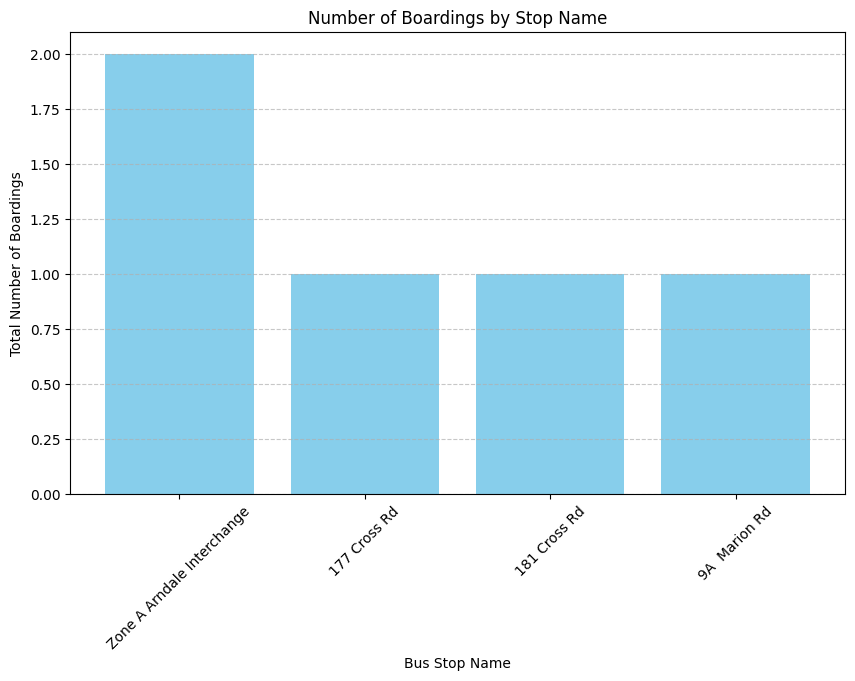

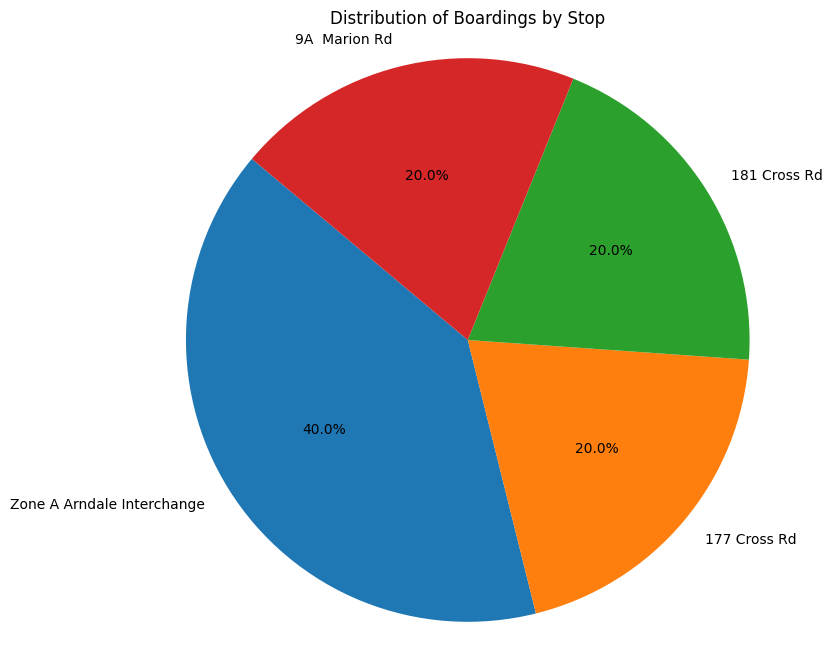

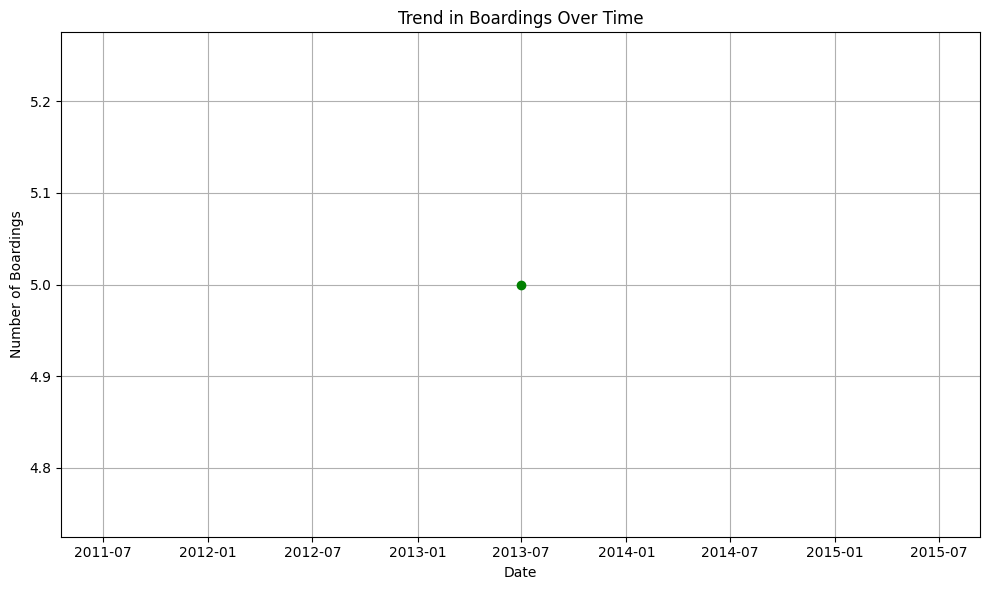

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (you can replace this with your actual data)
data = {
    'TripID': [23631, 23632, 23633, 23634],
    'RouteID': [100, 100, 100, 100],
    'StopID': [14156, 14144, 12266, 13907],
    'StopName': ['181 Cross Rd', '177 Cross Rd', 'Zone A Arndale Interchange', '9A  Marion Rd'],
    'WeekBeginning': ['6/30/13 0:00', '6/30/13 0:00', '6/30/13 0:00', '6/30/13 0:00'],
    'NumberOfBoardings': [1, 1, 2, 1]
}

# Create a DataFrame from the sample data
df = pd.DataFrame(data)

# Group the data by 'StopName' and calculate the total number of boardings for each stop
stop_boardings = df.groupby('StopName')['NumberOfBoardings'].sum().reset_index()

# Sort the stops by the total number of boardings in descending order
stop_boardings = stop_boardings.sort_values(by='NumberOfBoardings', ascending=False)

# Visualization 1: Bar Chart - Total Boardings by Bus Stop
plt.figure(figsize=(10, 6))
plt.bar(stop_boardings['StopName'], stop_boardings['NumberOfBoardings'], color='skyblue')
plt.xlabel('Bus Stop Name')
plt.ylabel('Total Number of Boardings')
plt.title('Number of Boardings by Stop Name')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Visualization 2: Pie Chart - Distribution of Boardings by Stop
plt.figure(figsize=(8, 8))
plt.pie(stop_boardings['NumberOfBoardings'], labels=stop_boardings['StopName'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Boardings by Stop')
plt.axis('equal')

# Visualization 3: Line Chart - Trend in Boardings Over Time
df['WeekBeginning'] = pd.to_datetime(df['WeekBeginning'])
time_data = df.groupby('WeekBeginning')['NumberOfBoardings'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(time_data['WeekBeginning'], time_data['NumberOfBoardings'], marker='o', linestyle='-', color='g')
plt.xlabel('Date')
plt.ylabel('Number of Boardings')
plt.title('Trend in Boardings Over Time')
plt.grid(True)

# Display all three visualizations
plt.tight_layout()
plt.show()
